In [1]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import os

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

In [3]:
# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Task 5


In [4]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 5 folder
path = os.path.join(cwd, 'Task 5')

# Get the list of files in the Task 5 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 5 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

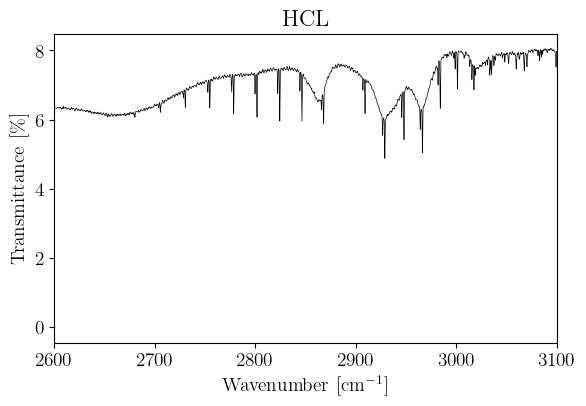

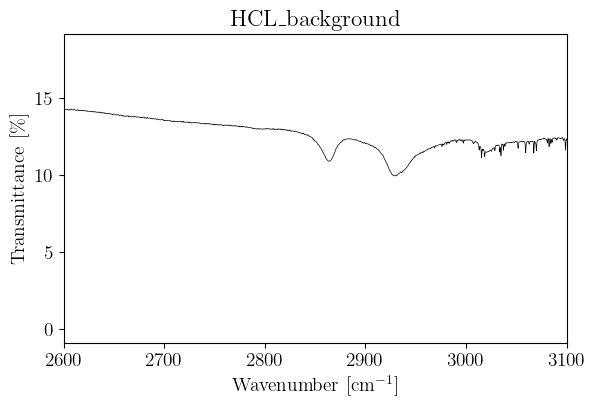

In [5]:
# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # plot the data
    plt.figure(figsize=set_size(469))
    plt.plot(x, y, color='black', linewidth=0.5)

    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]

    # Set the title of the plot
    plt.title(file_name_without_ext)

    # Set the labels of the x and y axes
    plt.xlabel('Wavenumber [cm$^{-1}$]')
    plt.xlim(2600,3100)
    plt.ylabel('Transmittance [$\%$]')
    plt.show()

In [6]:
HCL = data[0][1]
HCL = np.vstack(HCL)
x = HCL[:, 0]
y = HCL[:, 1]
y

array([ 7.022653,  7.018426,  7.013449, ..., -0.007855, -0.013244,
       -0.014201])

In [7]:
HCL_background = data[1][1]
HCL_background = np.vstack(HCL_background)
x_background = HCL_background[:, 0]
y_background = HCL_background[:, 1]
y_background

array([10.435433, 10.434139, 10.423975, ..., 18.210974, 18.226167,
       18.235816])

In [8]:
HCL_transmittance = y / y_background

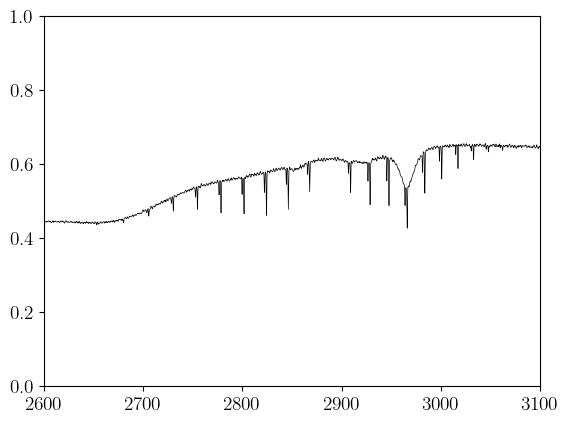

In [9]:
plt.plot(x, HCL_transmittance, color='black', linewidth=0.5)
plt.xlim(2600,3100)
plt.ylim(0, 1)
plt.show()

In [10]:
window_indices = (x >= 2600) & (x <= 3100)
window_x = x[window_indices]
window_HCL_transmittance = HCL_transmittance[window_indices]

In [11]:
from scipy.signal import find_peaks

# Find the peaks in the windowed HCL_transmittance data
peaks, _ = find_peaks(-window_HCL_transmittance, prominence=0.014)

peaks = peaks[2:]
peaks = np.append(peaks, 3169)
len(peaks)

32

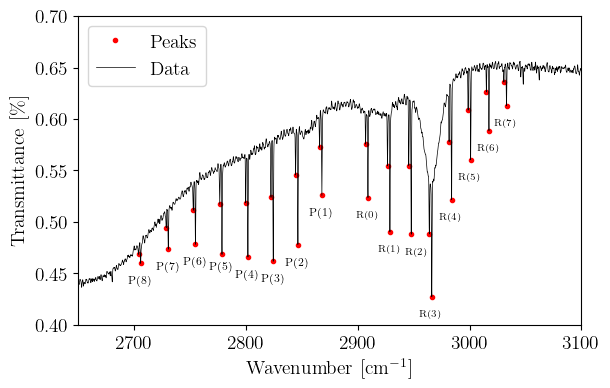

array([3033.125, 3030.75 , 3017.375, 3015.125, 3001.   , 2998.75 ,
       2984.   , 2981.75 , 2966.25 , 2964.   , 2947.875, 2945.625,
       2928.75 , 2926.625, 2909.125, 2907.   , 2867.875, 2865.875,
       2846.375, 2844.375, 2824.375, 2822.375, 2801.75 , 2799.75 ,
       2778.5  , 2776.5  , 2754.75 , 2752.875, 2730.5  , 2728.625,
       2705.75 , 2703.875])

In [12]:
plt.figure(figsize=set_size(469))
plt.plot(window_x[peaks], window_HCL_transmittance[peaks], 'ro', markersize=3, label = 'Peaks')
plt.plot(window_x, window_HCL_transmittance, color='black', linewidth=0.5, label = 'Data')
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Transmittance [$\%$]')
plt.ylim(0.4,0.7)
plt.xlim(2650,3100)
plt.legend()
# Label the first 8 pairs of peaks
for i in range(0, min(16, len(peaks) - 1), 2):
    if (14-i)/2 != 2:
        peak1 = peaks[i]
        peak2 = peaks[i + 1]
        midpoint_x = (window_x[peak1] + window_x[peak2]) / 2
        midpoint_y = window_HCL_transmittance[peak1] - 0.02
        plt.text(midpoint_x, midpoint_y, f'R({(14-i)//2})', fontsize=7, ha='center')
    else:
        peak1 = peaks[i]
        peak2 = peaks[i + 1]
        midpoint_x = (window_x[peak1] + window_x[peak2]) / 2 + 5
        midpoint_y = window_HCL_transmittance[peak1] - 0.02
        plt.text(midpoint_x, midpoint_y, f'R({(14-i)//2})', fontsize=7, ha='center')

# Label the last 8 pairs of peaks
num_pairs = 8
start_index = max(0, len(peaks) - num_pairs * 2)
for i in range(start_index, len(peaks) - 1, 2):
    if 8-(30-i)/2 != 5:    
        peak1 = peaks[i]
        peak2 = peaks[i + 1]
        midpoint_x = (window_x[peak1] + window_x[peak2]) / 2
        midpoint_y = window_HCL_transmittance[peak1] - 0.02
        plt.text(midpoint_x, midpoint_y, f'P({8-(30-i)//2})', fontsize=8, ha='center')
    else:
        peak1 = peaks[i]
        peak2 = peaks[i + 1]
        midpoint_x = (window_x[peak1] + window_x[peak2]) / 2
        midpoint_y = window_HCL_transmittance[peak1] - 0.015
        plt.text(midpoint_x, midpoint_y, f'P({8-(30-i)//2})', fontsize=8, ha='center')

plt.show()

window_x[peaks]

In [13]:
Cl37_peaks_indecies = peaks[1::2]
Cl35_peaks_indecies = peaks[::2]
Cl37_peaks_wavenumbers = window_x[Cl37_peaks_indecies]
Cl35_peaks_wavenumbers = window_x[Cl35_peaks_indecies]
Cl37_peaks_wavenumbers

array([3030.75 , 3015.125, 2998.75 , 2981.75 , 2964.   , 2945.625,
       2926.625, 2907.   , 2865.875, 2844.375, 2822.375, 2799.75 ,
       2776.5  , 2752.875, 2728.625, 2703.875])

In [14]:
#Spectral splitting

splitting = Cl35_peaks_wavenumbers - Cl37_peaks_wavenumbers
splitting

array([2.375, 2.25 , 2.25 , 2.25 , 2.25 , 2.25 , 2.125, 2.125, 2.   ,
       2.   , 2.   , 2.   , 2.   , 1.875, 1.875, 1.875])

In [15]:
Cl35_peaks_indecies, Cl37_peaks_indecies

(array([ 535,  661,  792,  928, 1070, 1217, 1370, 1527, 1857, 2029, 2205,
        2386, 2572, 2762, 2956, 3154], dtype=int64),
 array([ 554,  679,  810,  946, 1088, 1235, 1387, 1544, 1873, 2045, 2221,
        2402, 2588, 2777, 2971, 3169], dtype=int64))

In [16]:
P_37 = Cl37_peaks_wavenumbers[8:16]
P_35 = Cl35_peaks_wavenumbers[8:16]
R_35 = np.flip(Cl35_peaks_wavenumbers[0:8])
R_37 = np.flip(Cl37_peaks_wavenumbers[0:8])
R_37, R_35

(array([2907.   , 2926.625, 2945.625, 2964.   , 2981.75 , 2998.75 ,
        3015.125, 3030.75 ]),
 array([2909.125, 2928.75 , 2947.875, 2966.25 , 2984.   , 3001.   ,
        3017.375, 3033.125]))

In [17]:
P_37, P_35

(array([2865.875, 2844.375, 2822.375, 2799.75 , 2776.5  , 2752.875,
        2728.625, 2703.875]),
 array([2867.875, 2846.375, 2824.375, 2801.75 , 2778.5  , 2754.75 ,
        2730.5  , 2705.75 ]))

In [18]:
#pure vibrational transition wavenumbers
v_s_37 = (R_37[0] + P_37[0]) / 2
v_s_35 = (R_35[0] + P_35[0]) / 2

v_s_37, v_s_35

(2886.4375, 2888.5)

In [19]:
#rotational constant

B_37 = (R_37[0] - P_37[0]) / 4
B_35 = (R_35[0] - P_35[0]) / 4
B_37, B_35

(10.28125, 10.3125)

In [20]:
#reduced mass
c = 299792458 #m/s
h = 6.62607015e-34 #m^2 kg / s
m_hydrogen = 1.00784 * 1.66053906660e-27 #kg
m_chlorine_35 = 34.96885 * 1.66053906660e-27 #kg
m_chlorine_37 = 36.96590 * 1.66053906660e-27 #kg

mu_35 = (m_hydrogen * m_chlorine_35) / (m_hydrogen + m_chlorine_35) #kg
mu_37 = (m_hydrogen * m_chlorine_37) / (m_hydrogen + m_chlorine_37) #kg

mu_35, mu_37

(1.6266751590749944e-27, 1.629140725125101e-27)

In [21]:
#force constant

k_37 = 4 * np.pi**2 * c**2 * mu_37 * (v_s_37*100)**2 #wavenumber converted to 1/meters
k_35 = 4 * np.pi**2 * c**2 * mu_35 * (v_s_35*100)**2 #wavenumber converted to 1/meters

k_37, k_35

(481.59731742973173, 481.5559141482707)

In [22]:
#moment of inertia

I_37 = h/(8*np.pi**2*c*B_37*100) #kg*m^2
I_35 = h/(8*np.pi**2*c*B_35*100) #kg*m^2

I_37, I_35

(2.7226992674018323e-47, 2.714448663561221e-47)

In [23]:
#r0 bond length

r0_37 = np.sqrt(I_37/k_37) #meters
r0_35 = np.sqrt(I_35/k_35) #meters

r0_37, r0_35

(2.3777041054824467e-25, 2.3742008482372133e-25)

In [24]:
P_37_reordered , P_35_reordered = np.flip(P_37), np.flip(P_35)
P_37_reordered , P_35_reordered, R_37, R_35 

(array([2703.875, 2728.625, 2752.875, 2776.5  , 2799.75 , 2822.375,
        2844.375, 2865.875]),
 array([2705.75 , 2730.5  , 2754.75 , 2778.5  , 2801.75 , 2824.375,
        2846.375, 2867.875]),
 array([2907.   , 2926.625, 2945.625, 2964.   , 2981.75 , 2998.75 ,
        3015.125, 3030.75 ]),
 array([2909.125, 2928.75 , 2947.875, 2966.25 , 2984.   , 3001.   ,
        3017.375, 3033.125]))

In [25]:
#first order differences

index = np.array([-7,-6,-5,-4,-3,-2,-1,2,3,4,5,6,7,8])

first_order_difference_P_37 = [P_37_reordered[i+1] - P_37_reordered[i] for i in range(7)]
first_order_difference_P_35 = [P_35_reordered[i+1] - P_35_reordered[i] for i in range(7)]


first_order_difference_R_37 = [R_37[i+1] - R_37[i] for i in range(7)]
first_order_difference_R_35 = [R_35[i+1] - R_35[i] for i in range(7)]

first_order_difference_37 = np.concatenate((first_order_difference_P_37, first_order_difference_R_37))
first_order_difference_35 = np.concatenate((first_order_difference_P_35, first_order_difference_R_35))

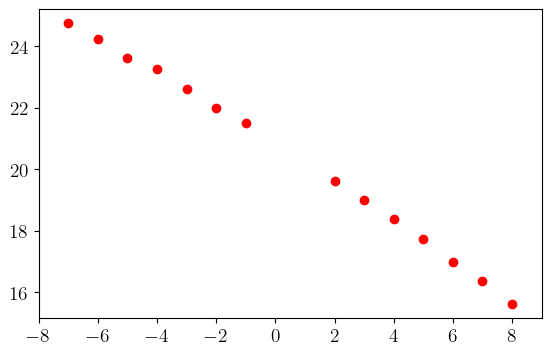

In [26]:
plt.figure(figsize=set_size(469))
plt.plot(index, first_order_difference_37, 'ro')
plt.xlim(-8,9)
plt.xticks(np.arange(-8, 10, 2))
plt.show()


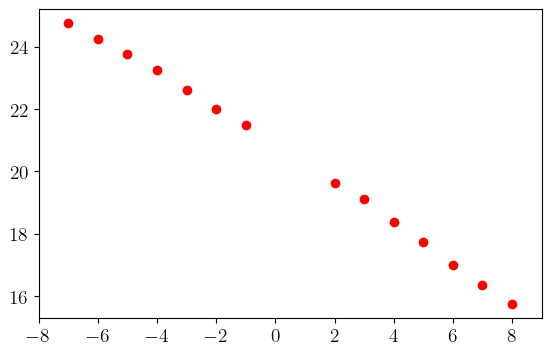

In [27]:
plt.figure(figsize=set_size(469))
plt.plot(index, first_order_difference_35, 'ro')
plt.xlim(-8,9)
plt.xticks(np.arange(-8, 10, 2))
plt.show()

In [28]:
#second order difference
index_prime = np.delete(index, [0,6])
second_order_difference_37 = [first_order_difference_37[i+1] - first_order_difference_37[i] for i in range(13)]
second_order_difference_35 = [first_order_difference_35[i+1] - first_order_difference_35[i] for i in range(13)]

second_order_difference_37 = np.delete(second_order_difference_37, 6)
second_order_difference_35 = np.delete(second_order_difference_35, 6)

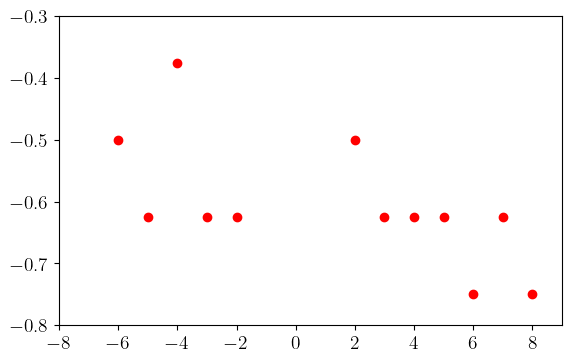

In [29]:

plt.figure(figsize=set_size(469))
plt.plot(index_prime, second_order_difference_37, 'ro')
plt.xlim(-8,9)
plt.ylim(-0.8,-0.3)
plt.xticks(np.arange(-8, 10, 2))
plt.show()

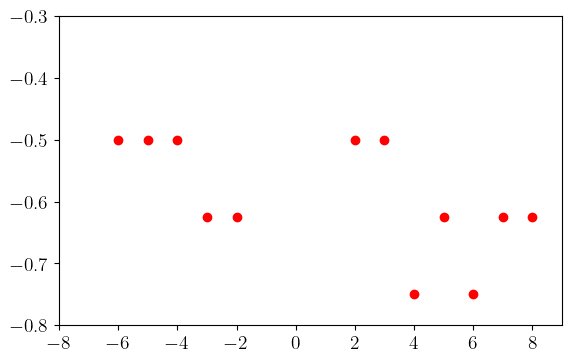

In [30]:
plt.figure(figsize=set_size(469))
plt.plot(index_prime, second_order_difference_35, 'ro')
plt.xlim(-8,9)
plt.ylim(-0.8,-0.3)
plt.xticks(np.arange(-8, 10, 2))
plt.show()

In [31]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def linear_func(x, m, c):
    return m * x + c

# Fit a linear function to the second order differences of the last two graphs
coefficients_37, covariance_37 = curve_fit(linear_func, index_prime, second_order_difference_37)
coefficients_35, covariance_35 = curve_fit(linear_func, index_prime, second_order_difference_35)

# Get the slope and intercept of the linear fit
slope_37 = coefficients_37[0]
intercept_37 = coefficients_37[1]

slope_35 = coefficients_35[0]
intercept_35 = coefficients_35[1]

# Get the error on the parameters
error_37 = np.sqrt(np.diag(covariance_37))
error_35 = np.sqrt(np.diag(covariance_35))

error_37, error_35

(array([0.00517743, 0.02558336]), array([0.00488779, 0.02415213]))

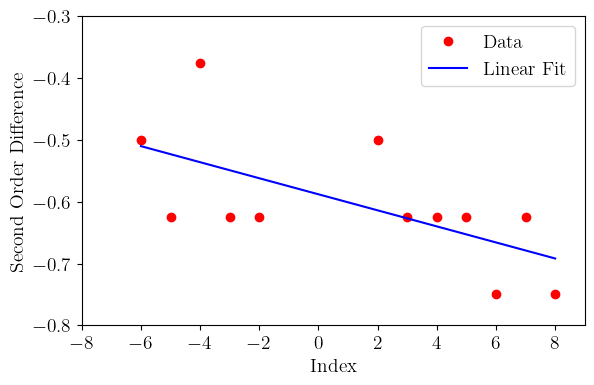

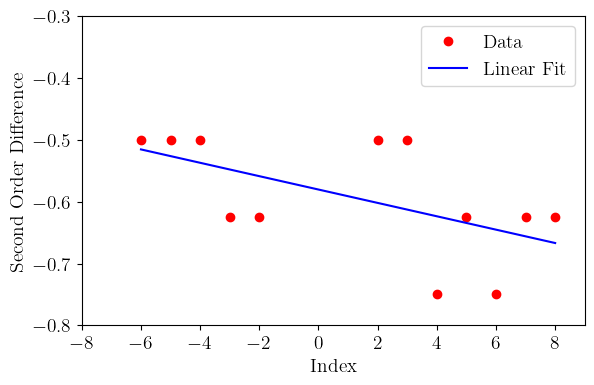

In [32]:
# Plot the data and the linear fit
plt.figure(figsize=set_size(469))
plt.plot(index_prime, second_order_difference_37, 'ro', label='Data')
plt.plot(index_prime, linear_func(index_prime, slope_37, intercept_37), 'b-', label='Linear Fit')
plt.xlabel('Index')
plt.ylabel('Second Order Difference')
plt.xlim(-8,9)
plt.ylim(-0.8,-0.3)
plt.xticks(np.arange(-8, 10, 2))
plt.legend()
plt.show()

plt.figure(figsize=set_size(469))
plt.plot(index_prime, second_order_difference_35, 'ro', label='Data')
plt.plot(index_prime, linear_func(index_prime, slope_35, intercept_35), 'b-', label='Linear Fit')
plt.xlabel('Index')
plt.ylabel('Second Order Difference')
plt.xlim(-8,9)
plt.ylim(-0.8,-0.3)
plt.xticks(np.arange(-8, 10, 2))
plt.legend()
plt.show()


In [33]:
D_35 = -slope_35/24
D_37 = -slope_37/24

D_35, D_37

(0.0004510407171991286, 0.0005412488606207818)

In [34]:
import numpy as np
from scipy.optimize import curve_fit
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit a quadratic function to the first order differences
coefficients_35, covariance_35 = curve_fit(quadratic_func, index, first_order_difference_35)
coefficients_37, covariance_37 = curve_fit(quadratic_func, index, first_order_difference_37)

# Get the error on the parameters
error_37 = np.sqrt(np.diag(covariance_37))
error_35 = np.sqrt(np.diag(covariance_35))

error_37, error_35

(array([0.00065592, 0.00252813, 0.01984604]),
 array([0.00073121, 0.00281829, 0.02212381]))

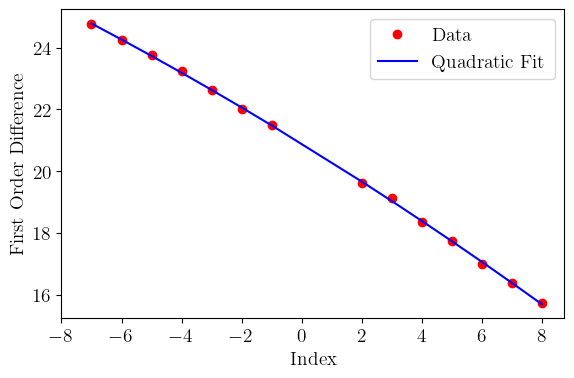

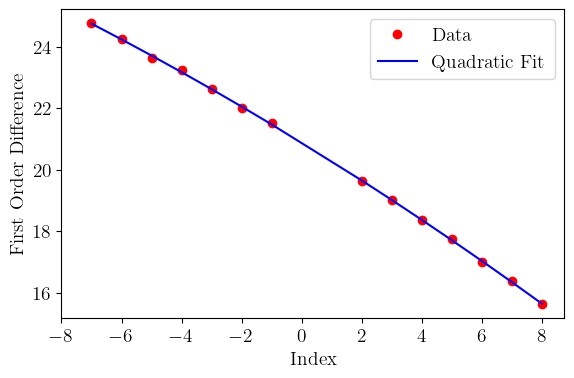

In [35]:

# Plot the data and the quadratic fit for first order differences of Cl35
plt.figure(figsize=set_size(469))
plt.plot(index, first_order_difference_35, 'ro', label='Data')
plt.plot(index, quadratic_func(index, *coefficients_35), 'b-', label='Quadratic Fit')
plt.xlabel('Index')
plt.ylabel('First Order Difference')
plt.xticks(np.arange(-8, 10, 2))
plt.legend()
plt.show()

# Plot the data and the quadratic fit for first order differences of Cl37
plt.figure(figsize=set_size(469))
plt.plot(index, first_order_difference_37, 'ro', label='Data')
plt.plot(index, quadratic_func(index, *coefficients_37), 'b-', label='Quadratic Fit')
plt.xlabel('Index')
plt.ylabel('First Order Difference')
plt.xticks(np.arange(-8, 10, 2))
plt.legend()
plt.show()

In [36]:
D_35_quadratic = - coefficients_35[0] / 12
D_37_quadratic = - coefficients_37[0] / 12

D_35_quadratic, D_37_quadratic

(0.0005181760205910657, 0.000562464556137597)

In [37]:
B1_35 = coefficients_35[2] / 2 + D_35_quadratic
B1_37 = coefficients_37[2] / 2 + D_37_quadratic

B0_35 = coefficients_35[1] / 2 - 3 * D_35_quadratic*2 + B1_35
B0_37 = coefficients_37[1] / 2 - 3 * D_37_quadratic*2 + B1_37

B0_35, B1_35, B0_37, B1_37

(10.142606067897216, 10.44516497806206, 10.135220836324537, 10.438608170669653)

In [38]:
#abundance
k = 1.380649e-23
J = 3

wavenumberpeak_37 = Cl37_peaks_wavenumbers[5]
wavenumberpeak_35 = Cl35_peaks_wavenumbers[5]

cl37 = np.log((window_HCL_transmittance[Cl37_peaks_indecies])[10])/(wavenumberpeak_37* (2*J+1)*np.exp(-h*c*(B0_37*100)*J*(J+1)/(k*300)))
cl35 = np.log((window_HCL_transmittance[Cl35_peaks_indecies])[10])/(wavenumberpeak_35* (2*J+1)*np.exp(-h*c*(B0_35*100)*J*(J+1)/(k*300)))

ratio = cl37/cl35
ratio2 = np.log((window_HCL_transmittance[Cl37_peaks_indecies])[10])/np.log((window_HCL_transmittance[Cl35_peaks_indecies])[10])


ratio, ratio2

(0.8370992560155399, 0.8368159248769876)

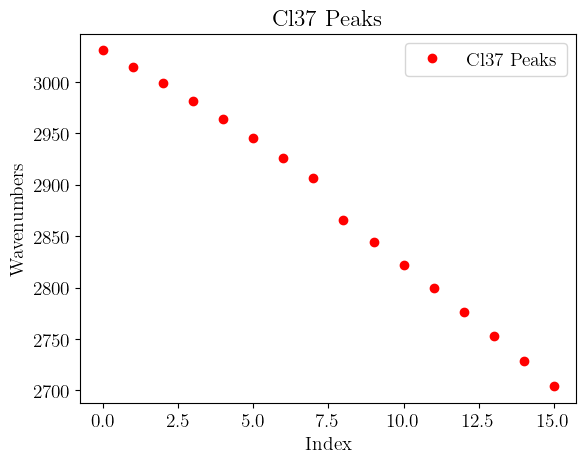

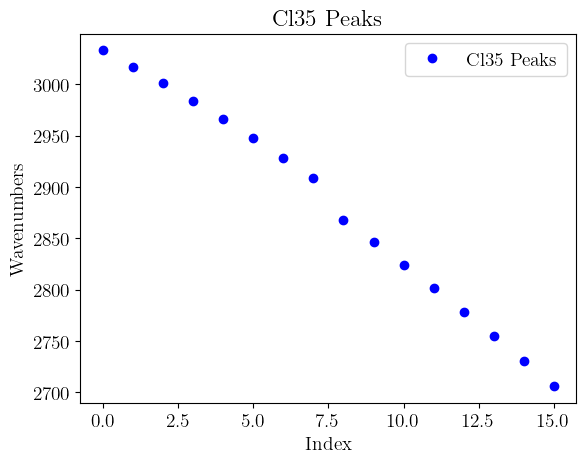

In [39]:
import matplotlib.pyplot as plt

# Plot Cl37_peaks_wavenumbers
plt.plot(Cl37_peaks_wavenumbers, 'ro', label='Cl37 Peaks')
# Set the x-axis label
plt.xlabel('Index')

# Set the y-axis label
plt.ylabel('Wavenumbers')

# Set the title of the plot
plt.title('Cl37 Peaks')

# Add a legend
plt.legend()

# Show the plot
plt.show()
# Plot Cl35_peaks_wavenumbers
plt.plot(Cl35_peaks_wavenumbers, 'bo', label='Cl35 Peaks')

# Set the x-axis label
plt.xlabel('Index')

# Set the y-axis label
plt.ylabel('Wavenumbers')

# Set the title of the plot
plt.title('Cl35 Peaks')

# Add a legend
plt.legend()

# Show the plot
plt.show()

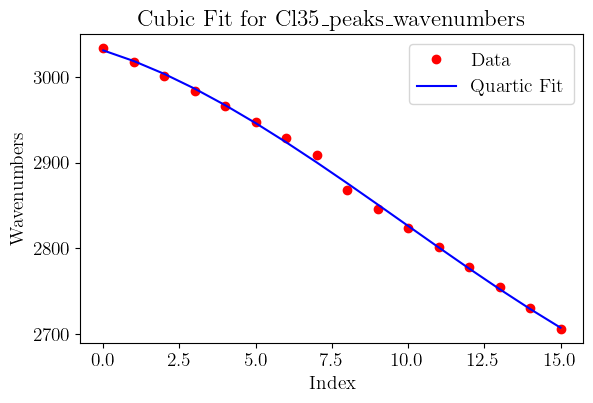

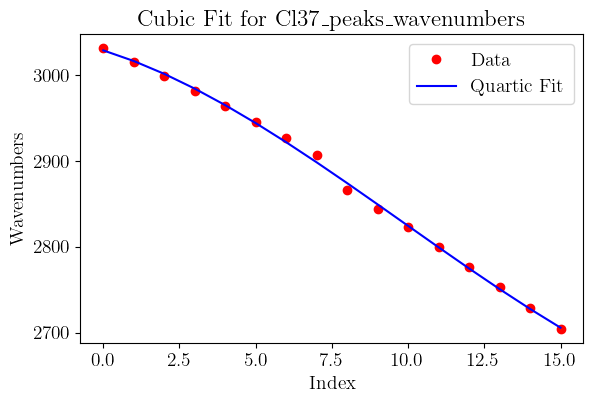

In [40]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

# Define the function for the quartic fit
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

indicies = np.arange(0, len(Cl35_peaks_indecies), 1)

# Perform the quartic fit for Cl35_peaks_wavenumbers
coefficients_35, _ = curve_fit(cubic_func, indicies, Cl35_peaks_wavenumbers)

# Perform the quartic fit for Cl37_peaks_wavenumbers
coefficients_37, _ = curve_fit(cubic_func, indicies, Cl37_peaks_wavenumbers)

# Generate y values for the quartic fit of Cl35_peaks_wavenumbers
y_35 = cubic_func(indicies , *coefficients_35)

# Generate y values for the quartic fit of Cl37_peaks_wavenumbers
y_37 = cubic_func(indicies , *coefficients_37)

# Plot the data and the quartic fit for Cl35_peaks_wavenumbers
plt.figure(figsize=set_size(469))
plt.plot(indicies, Cl35_peaks_wavenumbers, 'ro', label='Data')
plt.plot(indicies, y_35, 'b-', label='Quartic Fit')
plt.xlabel('Index')
plt.ylabel('Wavenumbers')
plt.title('Cubic Fit for Cl35_peaks_wavenumbers')
plt.legend()
plt.show()

# Plot the data and the quartic fit for Cl37_peaks_wavenumbers
plt.figure(figsize=set_size(469))
plt.plot(indicies, Cl37_peaks_wavenumbers, 'ro', label='Data')
plt.plot(indicies, y_37, 'b-', label='Quartic Fit')
plt.xlabel('Index')
plt.ylabel('Wavenumbers')
plt.title('Cubic Fit for Cl37_peaks_wavenumbers')
plt.legend()
plt.show()

In [41]:
coefficients_35, coefficients_37

(array([ 4.83146616e-02, -1.42581851e+00, -1.10389371e+01,  3.03089570e+03]),
 array([ 4.82137777e-02, -1.42376746e+00, -1.10161194e+01,  3.02856266e+03]))

In [42]:
D_35_quartic = - coefficients_35[0] / 4
D_37_quartic = - coefficients_37[0] / 4 

D_35_quartic, D_37_quartic

(-0.012078665389389565, -0.012053444437310906)

# Task 4

In [43]:
# Get the path to the Task 4 folder
path = os.path.join(cwd, 'Task 4')

# Get the list of files in the Task 4 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 4 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

In [44]:
Cuvette = data[0][1]
Cuvette = np.vstack(Cuvette)
Cuvette_x = Cuvette[:, 0]
Cuvette_y = Cuvette[:, 1] 

In [45]:
#get the background data

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

In [46]:
water_vapour = data[1][1]
water_vapour = np.vstack(water_vapour)
water_vapour_x = water_vapour[:, 0]
water_vapour_y = water_vapour[:, 1]



In [47]:
Cuvette_y = Cuvette_y / water_vapour_y

In [48]:
window_Cuvette_indices = np.where((Cuvette_x >= 2400) & (Cuvette_x <= 3500))
window_Cuvette_x = Cuvette_x[window_Cuvette_indices]
window_Cuvette_y = Cuvette_y[window_Cuvette_indices]


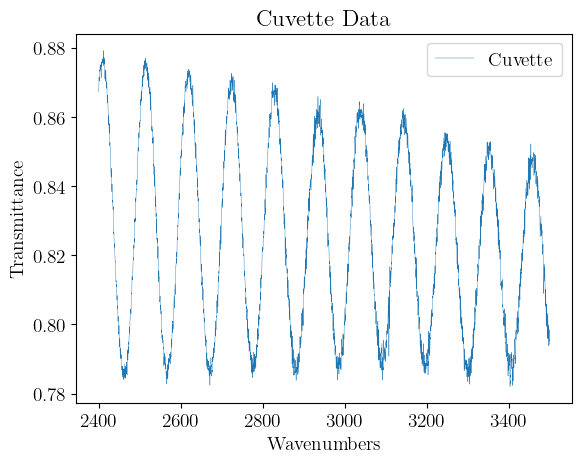

In [49]:

# Plot the Cuvette data
plt.plot(window_Cuvette_x, window_Cuvette_y, linewidth=0.3, label='Cuvette')

# Set the x-axis label
plt.xlabel('Wavenumbers')

# Set the y-axis label
plt.ylabel('Transmittance')

# Set the title of the plot
plt.title('Cuvette Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [50]:
cuvette_peaks_inidcies = find_peaks(-window_Cuvette_y, prominence=0.01, distance = 300)[0]
cuvette_peaks_inidcies_flipped = np.flip(cuvette_peaks_inidcies) #for the curve fit
cuvette_peaks = window_Cuvette_x[cuvette_peaks_inidcies]
cuvette_peaks = np.flip(cuvette_peaks)
cuvette_peaks

array([2461.25 , 2566.   , 2671.125, 2775.125, 2881.5  , 2983.   ,
       3092.125, 3203.25 , 3304.   , 3403.375])

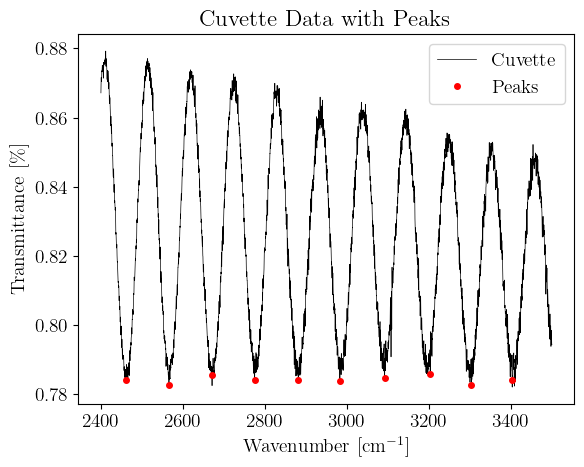

In [51]:
# Plot the Cuvette data
plt.plot(window_Cuvette_x, window_Cuvette_y, linewidth=0.5, color="black" ,label='Cuvette')

for i in range(len(cuvette_peaks_inidcies)):
    if i == 0: 
        plt.plot(cuvette_peaks[i], window_Cuvette_y[cuvette_peaks_inidcies[i]]+0.002, ".", color="red", markersize=8, label='Peaks')
    elif i == 7:
        plt.plot(cuvette_peaks[i], window_Cuvette_y[cuvette_peaks_inidcies[i]]+0.0035, ".", color="red", markersize=8)
    else:
        plt.plot(cuvette_peaks[i], window_Cuvette_y[cuvette_peaks_inidcies[i]], ".", color="red", markersize=8)
# Set the x-axis label
plt.xlabel('Wavenumber [cm$^{-1}$]')

# Set the y-axis label
plt.ylabel('Transmittance [$\%$]')

# Set the title of the plot
plt.title('Cuvette Data with Peaks')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [52]:
N = np.arange(0, len(cuvette_peaks_inidcies), 1)

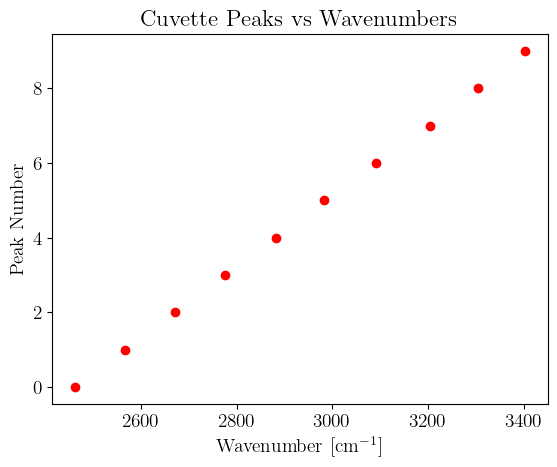

In [53]:
plt.plot(window_Cuvette_x[cuvette_peaks_inidcies_flipped], N, 'ro')
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Peak Number')
plt.title('Cuvette Peaks vs Wavenumbers')
plt.show()

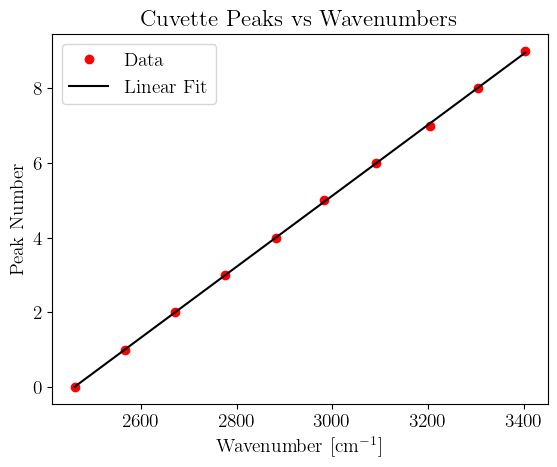

(0.009504804972603163,
 -23.387810649990627,
 array([3.00797625e-05, 8.87231091e-02]))

In [54]:
def linear_func(x, m, c):
    return m * x + c

# Perform the linear curve fit
coefficients, covariance = curve_fit(linear_func, window_Cuvette_x[cuvette_peaks_inidcies_flipped], N, p0 = [0.01, 3000])

# Get the slope and intercept of the linear fit
slope = coefficients[0]
intercept = coefficients[1]

# Get the error on the parameters
error = np.sqrt(np.diag(covariance))

# Plot the data and the linear fit
plt.plot(window_Cuvette_x[cuvette_peaks_inidcies_flipped], N, 'ro', label='Data')
plt.plot(window_Cuvette_x[cuvette_peaks_inidcies_flipped], linear_func(window_Cuvette_x[cuvette_peaks_inidcies_flipped], *coefficients), label='Linear Fit', color = "black")
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Peak Number')
plt.title('Cuvette Peaks vs Wavenumbers')
plt.legend()

# Show the plot
plt.show()

slope, intercept, error

In [55]:
d = slope/2 * 10**(4) #micrometers
error_on_d = error[0]/2 * 10**(4) #micrometers

d, error_on_d

(47.52402486301582, 0.1503988125909418)

# Task 6

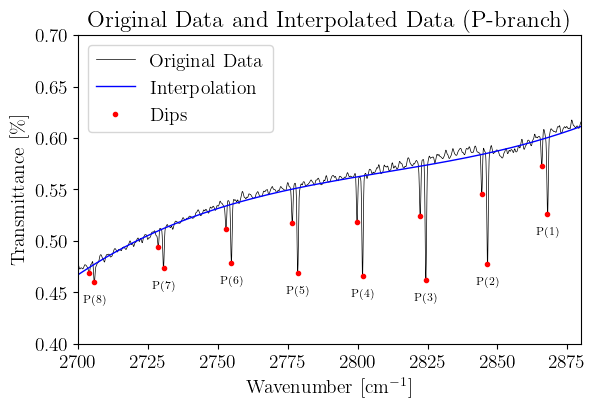

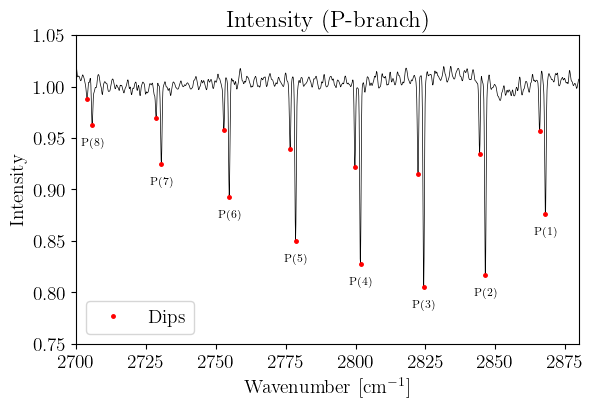

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, PchipInterpolator

# Assuming window_x, window_HCL_transmittance, and peaks are already defined

# Define the P-branch range (adjust the range as needed)
p_branch_min = 2700
p_branch_max = 2880  # Updated to 2900

# Filter the data to include only the P-branch range
p_branch_mask = (window_x >= p_branch_min) & (window_x <= p_branch_max)
window_x_p_branch = window_x[p_branch_mask]
window_HCL_transmittance_p_branch = window_HCL_transmittance[p_branch_mask]

# Adjust the peaks to match the filtered data
peaks_p_branch = [i for i in peaks if p_branch_min <= window_x[i] <= p_branch_max]

# After filtering, get the indices of peaks in the sorted array
sorted_indices = np.argsort(window_x_p_branch)
peaks_sorted = [np.where(sorted_indices == np.where(window_x_p_branch == window_x[i])[0][0])[0][0] for i in peaks_p_branch]

# Sort the data by window_x
window_x_sorted = window_x_p_branch[sorted_indices]
window_HCL_transmittance_sorted = window_HCL_transmittance_p_branch[sorted_indices]

# Mask the peaks
mask = np.ones(len(window_HCL_transmittance_sorted), dtype=bool)
mask[peaks_sorted] = False

# Interpolate the remaining data using PCHIP
spline = UnivariateSpline(window_x_sorted[mask], window_HCL_transmittance_sorted[mask], s=10)

# Generate interpolated data
interpolated_y = spline(window_x_sorted)

# Divide the original data by the interpolated data to get the intensity
intensity = window_HCL_transmittance_sorted/ interpolated_y

# Plot the original data and interpolated data
plt.figure(figsize=set_size(469))
plt.plot(window_x_sorted, window_HCL_transmittance_sorted, color='black', linewidth=0.5, label='Original Data')
plt.plot(window_x_sorted, interpolated_y, color='blue', linewidth=1, label='Interpolation')
plt.plot(window_x_sorted[peaks_sorted], window_HCL_transmittance_sorted[peaks_sorted], 'r.',  label='Dips')

# Add labels for the peaks
for i, peak in enumerate(peaks_sorted):
    if i % 2 == 0:  # Label every second peak pair
        peak_label = f'P({i//2 + 1})'
        midpoint_x = window_x_sorted[peak]
        midpoint_y = window_HCL_transmittance_sorted[peak] - 0.02  # Adjust the vertical position as needed
        plt.text(midpoint_x, midpoint_y, peak_label, fontsize=8, ha='center')

plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Transmittance [$\%$]')
plt.ylim(0.4, 0.7)
plt.xlim(p_branch_min, p_branch_max)
plt.legend()
plt.title('Original Data and Interpolated Data (P-branch)')

plt.show()
plt.close()

# Plot the intensity
plt.figure(figsize=set_size(469))
plt.plot(window_x_sorted, intensity, color='black', linewidth=0.5)
plt.plot(window_x_sorted[peaks_sorted], intensity[peaks_sorted], 'r.', markersize=5, label='Dips')

# Add labels for the intensity peaks
for i, peak in enumerate(peaks_sorted):
    if i % 2 == 0:  # Label every second peak pair
        peak_label = f'P({i//2 + 1})'
        midpoint_x = window_x_sorted[peak]
        midpoint_y = intensity[peak] -0.02   # Adjust the vertical position as needed
        plt.text(midpoint_x, midpoint_y, peak_label, fontsize=8, ha='center')

plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Intensity')
plt.xlim(p_branch_min, p_branch_max)
plt.ylim(0.75, 1.05)
plt.legend()
plt.title('Intensity (P-branch)')

plt.show()
plt.close()


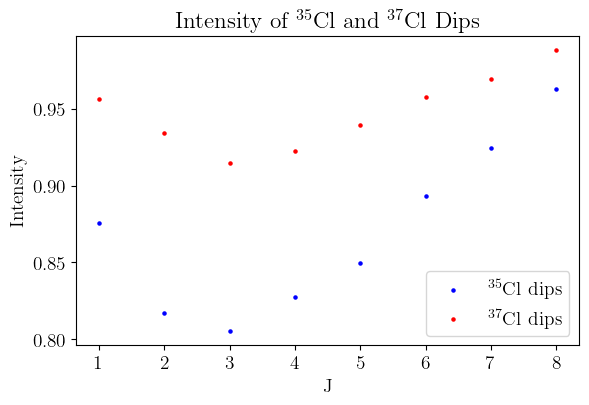

In [57]:
# Initialize lists for Cl35 and C37 peaks
Cl35_peaks = []
C37_peaks = []

# Separate the peaks into Cl35 and C37
for i, peak in enumerate(peaks_sorted):
    if i % 2 == 0:
        Cl35_peaks.append(peak)
    else:
        C37_peaks.append(peak)

# Extract the intensities for Cl35 and C37 peaks
Cl35_intensities = intensity[Cl35_peaks]
C37_intensities = intensity[C37_peaks]

# Plot the intensities against their indices
plt.figure(figsize=set_size(469))
plt.scatter(range(1, len(Cl35_intensities) + 1), Cl35_intensities, marker='o', s=5, label=r'$^{35}$Cl dips', color='blue')
plt.scatter(range(1, len(C37_intensities) + 1), C37_intensities, marker='o', s=5, label=r'$^{37}$Cl dips', color='red')

plt.xlabel('J')
plt.ylabel('Intensity')
plt.legend()
plt.title(r'Intensity of $^{35}$Cl and $^{37}$Cl Dips')
plt.show()

In [58]:
for i in range(0, 8):
    J=i+1
    k=1.380649e-23
    I_Cl35=Cl35_intensities[i]
    I_Cl37=C37_intensities[i]
    v_Cl35=window_x_sorted[Cl35_peaks[i]]
    v_Cl37=window_x_sorted[C37_peaks[i]]
    Cl_35=np.log((I_Cl35))/(v_Cl35 * (2*J+1)*np.exp(-h*c*(B0_35*100)*J*(J+1)/(k*350)))
    Cl_37=np.log((I_Cl37))/(v_Cl37 * (2*J+1)*np.exp(-h*c*(B0_37*100)*J*(J+1)/(k*350)))
    ratio=Cl_37/Cl_35
    print(ratio*100)


33.70189087974735
33.66666338772167
41.051531689350725
42.723310793570896
38.176074361370574
38.384560802218836
39.2740156268673
32.008537171205795


Parameters for Cl35: [ 3.56949492e+02 -1.76029101e-05]
Uncertainties for Cl35: [8.46432208e+00 4.04963876e-07]
R² for Cl35: 0.9923617723574032
Parameters for C37: [ 3.72341172e+02 -6.54808167e-06]
Uncertainties for C37: [2.35868536e+01 3.87482688e-07]
R² for C37: 0.954195547175064


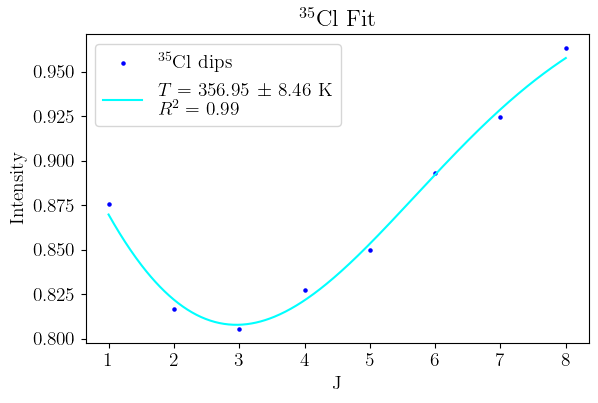

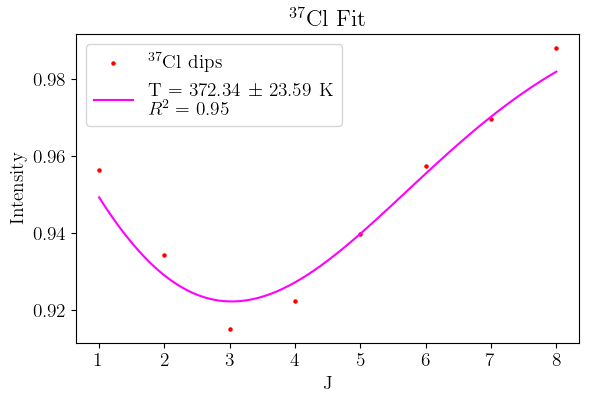

In [59]:



import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the fit functions
def fit_function_37(J, C, A):
    return np.exp(A * (2 * J + 1) * (v_s_37 - (B1_37 + B0_37) * J + (B1_37 - B0_37) * J**2 + 4 * (D_37_quadratic) * J**3) * np.exp(-h*c*(B0_37)*1e2 * J * (J + 1)/ (k*C)))

def fit_function_35(J, C, A):
    return np.exp(A * (2 * J + 1) * (v_s_35 - (B1_35 + B0_35) * J + (B1_35 - B0_35) * J**2 + 4 * (D_35_quadratic) * J**3) * np.exp(-h*c*(B0_35)*1e2 * J * (J + 1)/ (k*C)))

# Function to calculate R² value
def calculate_r_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Fit the functions to the data
J_Cl35 = np.arange(1, len(Cl35_intensities) + 1)
J_C37 = np.arange(1, len(C37_intensities) + 1)

k = 1.380649e-23
h = 6.62607015e-34
c = 299792458

p0 = [200, -0.001]
bounds = ([0, -np.inf], [400, np.inf])

params_35, cov_35 = curve_fit(fit_function_35, J_Cl35, Cl35_intensities, maxfev=50000, p0=p0, bounds=bounds)
params_37, cov_37 = curve_fit(fit_function_37, J_C37, C37_intensities, maxfev=50000, p0=p0, bounds=bounds)

# Calculate uncertainties
uncertainties_35 = np.sqrt(np.diag(cov_35))
uncertainties_37 = np.sqrt(np.diag(cov_37))

# Generate fitted data with more points for smoother lines
J_Cl35_fine = np.linspace(1, len(Cl35_intensities), 500)
J_C37_fine = np.linspace(1, len(C37_intensities), 500)

fitted_Cl35 = fit_function_35(J_Cl35_fine, *params_35)
fitted_C37 = fit_function_37(J_C37_fine, *params_37)

# Calculate R² values
r_squared_35 = calculate_r_squared(Cl35_intensities, fit_function_35(J_Cl35, *params_35))
r_squared_37 = calculate_r_squared(C37_intensities, fit_function_37(J_C37, *params_37))

# Print the parameters, uncertainties, and R² values
print(f"Parameters for Cl35: {params_35}")
print(f"Uncertainties for Cl35: {uncertainties_35}")
print(f"R² for Cl35: {r_squared_35}")
print(f"Parameters for C37: {params_37}")
print(f"Uncertainties for C37: {uncertainties_37}")
print(f"R² for C37: {r_squared_37}")

# Plot the intensities of Cl35 peaks with the fitted curve
plt.figure(figsize=set_size(469))
plt.scatter(J_Cl35, Cl35_intensities, label=r'$^{35}$Cl dips', s=5, color='blue')
plt.plot(J_Cl35_fine, fitted_Cl35, label=f'$T =$ {params_35[0]:.2f} $\pm$ {uncertainties_35[0]:.2f} K \n $R^2 =$ {r_squared_35:.2f}', color='cyan')
plt.xlabel('J')
plt.ylabel('Intensity')
plt.legend()
plt.title(r'$^{35}$Cl Fit')
#plt.savefig('Latex\Figures\Task 6\Cl35_fit.pgf', bbox_inches='tight', format='pgf')
plt.show()
plt.close()

# Plot the intensities of C37 peaks with the fitted curve
plt.figure(figsize=set_size(469))
plt.scatter(J_C37, C37_intensities, label=r'$^{37}$Cl dips', s=5, color='red')
plt.plot(J_C37_fine, fitted_C37, label=f'T = {params_37[0]:.2f} $\pm$ {uncertainties_37[0]:.2f} K \n $R^2 =$ {r_squared_37:.2f}', color='magenta')
plt.xlabel('J')
plt.ylabel('Intensity')
plt.legend()
plt.title(r'$^{37}$Cl Fit')
#plt.savefig('Latex\Figures\Task 6\Cl37_fit.pgf', bbox_inches='tight', format='pgf')
plt.show()
plt.close()